In [4]:
import pandas as pd

In [5]:
DF = pd.read_csv("D://Study//BA//March-April Classes//Par-Logistic-Regression-PBA//data//bank-full.csv")

In [6]:
DF.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [8]:
DF.age = DF.age.fillna(40.95)

In [9]:
DF.balance = DF.balance.fillna(1362.346)

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45211 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45211 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


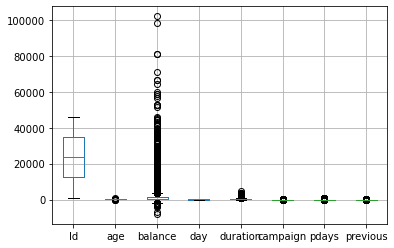

In [11]:
DF.boxplot()

In [12]:
import numpy as np

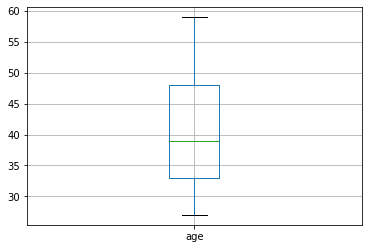

In [13]:
max=DF['age'].quantile(0.95)
new=np.where(DF['age']>max,max,DF['age'])
DF.age=new

min=DF['age'].quantile(0.05)
new=np.where(DF['age']<min,min,DF['age'])
DF.age=new
DF.boxplot('age')

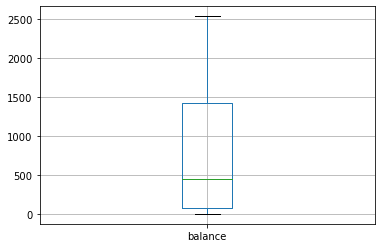

In [14]:
max=DF['balance'].quantile(0.85)
new=np.where(DF['balance']>max,max,DF['balance'])
DF.balance=new

min=DF['balance'].quantile(0.10)
new=np.where(DF['balance']<min,min,DF['balance'])
DF.balance=new
DF.boxplot('balance')

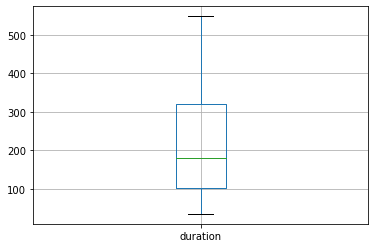

In [15]:
max=DF['duration'].quantile(0.90)
new=np.where(DF['duration']>max,max,DF['duration'])
DF.duration=new

min=DF['duration'].quantile(0.05)
new=np.where(DF['duration']<min,min,DF['duration'])
DF.duration=new
DF.boxplot('duration')

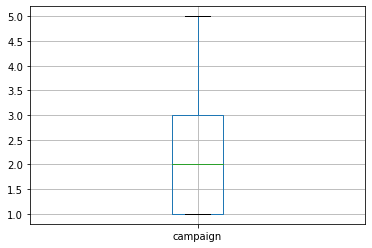

In [16]:
max=DF['campaign'].quantile(0.90)
new=np.where(DF['campaign']>max,max,DF['campaign'])
DF.campaign=new

min=DF['campaign'].quantile(0.05)
new=np.where(DF['campaign']<min,min,DF['campaign'])
DF.campaign=new
DF.boxplot('campaign')

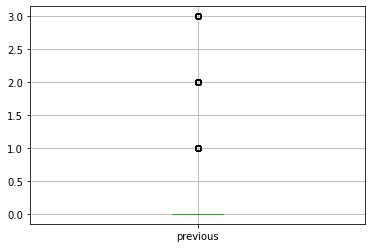

In [17]:
max=DF['previous'].quantile(0.95)
new=np.where(DF['previous']>max,max,DF['previous'])
DF.previous=new

min=DF['previous'].quantile(0.05)
new=np.where(DF['previous']<min,min,DF['previous'])
DF.previous=new
DF.boxplot('previous')

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
import numpy as np

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
del DF["Id"]

In [22]:
DF['y'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
DF.y=pd.Series(np.where(DF.y=='yes',1,0),
           DF.index)

In [24]:
##DF.y = DF.y.map(dict(yes=1, no=0))

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
DFn = DF.select_dtypes(numerics)

In [26]:
corr = DFn.corr()

In [27]:
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.116607,-0.007567,-0.024752,0.032015,-0.031038,-0.005730,0.003970
balance,0.116607,1.000000,0.012104,0.043112,-0.029075,0.020305,0.061711,0.094604
day,-0.007567,0.012104,1.000000,-0.042437,0.147384,-0.093044,-0.079935,-0.028348
duration,-0.024752,0.043112,-0.042437,1.000000,-0.096996,0.011753,0.021637,0.376597
campaign,0.032015,-0.029075,0.147384,-0.096996,1.000000,-0.090924,-0.081559,-0.083633
pdays,-0.031038,0.020305,-0.093044,0.011753,-0.090924,1.000000,0.773500,0.103621
previous,-0.005730,0.061711,-0.079935,0.021637,-0.081559,0.773500,1.000000,0.163192
y,0.003970,0.094604,-0.028348,0.376597,-0.083633,0.103621,0.163192,1.000000


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
x = DFn['y']
y = DFn[['balance','duration','campaign','pdays','previous']]

In [30]:
x = x.values.reshape(-1,1)

In [31]:
model = LinearRegression()

In [32]:
model = model.fit(x, y)

In [33]:
model = LinearRegression().fit(x, y)

In [34]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values,i) for i in range(y.shape[1])]
vif["features"] = y.columns
[variance_inflation_factor(y.values,i) for i in range(y.shape[1])]
for i in range(y.shape[1]):
    a = variance_inflation_factor(y.values,i)
    print(a)
vif


1.6657787809862779
2.076864168700385
2.0142812114650255
2.879436657691784
2.9597495423495355


,VIF Factor,features
0,1.665779,balance
1,2.076864,duration
2,2.014281,campaign
3,2.879437,pdays
4,2.959750,previous


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
import seaborn as sns

In [38]:
DF.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [64]:
dummies = pd.get_dummies(DF,columns=['default','housing','loan','job','marital','education','contact','month','poutcome'])

In [65]:
dummiesfinal = dummies.drop(columns=['age'])

In [66]:
###final = merged.drop(merged.columns[1],axis='columns')

In [67]:
dummiesfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              45211 non-null  float64
 1   day                  45211 non-null  int64  
 2   duration             45211 non-null  float64
 3   campaign             45211 non-null  float64
 4   pdays                45211 non-null  int64  
 5   previous             45211 non-null  float64
 6   y                    45211 non-null  int32  
 7   default_no           45211 non-null  uint8  
 8   default_yes          45211 non-null  uint8  
 9   housing_no           45211 non-null  uint8  
 10  housing_yes          45211 non-null  uint8  
 11  loan_no              45211 non-null  uint8  
 12  loan_yes             45211 non-null  uint8  
 13  job_admin.           45211 non-null  uint8  
 14  job_blue-collar      45211 non-null  uint8  
 15  job_entrepreneur     45211 non-null 

In [139]:
target = dummiesfinal.y
predictor = dummiesfinal.drop(['y','education_secondary','education_primary','marital_married','job_unknown','job_unemployed','job_technician','job_services','job_self-employed','job_management','job_admin.','previous'], axis=1)

In [140]:
target = np.array(target).T.reshape(-1,1)
predictor = np.array(predictor)

In [141]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(target,predictor, test_size=0.30)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
import statsmodels.api as sm
lm = sm.OLS(x_train,y_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:06:35   Log-Likelihood:                -3637.4
No. Observations:               31647   AIC:                             7343.
Df Residuals:                   31613   BIC:                             7627.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.055e-05   1.74e-06      6.077      0.000    7.15e-06     1.4e-05
x2             0.0013      0.000      5.986      0.000       0.001       0.002
x3             0.0007   9.77e-06     72.639      0.000       0.001       0.001
x4            -0.0050      0.001     -4.318      0.000      -0.007      -0.003
x5         -4.646e-05    3.3e-05     -1.407      0.159      -0.000    1.82e-05
x6             0.0191      0.005      3.879      0.000       0.009       0.029
x7             0.0168      0.007      2.300      0.021       0.002       0.031
x8             0.0410      0.003     13.761      0.000       0.035       0.047
x9            -0.0051      0.003     -1.668      0.095      -0.011       0.001
x10            0.0288      0.003      9.389      0.000       0.023       0.035
x11            0.0071      0.003      2.123      0.034       0.001       0.014
x12           -0.0116      0.004     -2.801      0.005      -0.020      -0.003
x13           -0.0129      0.009     -1.481      0.138      -0.030       0.004
x14           -0.0157      0.010     -1.630      0.103      -0.035       0.003
x15            0.0238      0.007      3.251      0.001       0.009       0.038
x16            0.0744      0.011      6.707      0.000       0.053       0.096
x17            0.0164      0.005      3.306      0.001       0.007       0.026
x18            0.0210      0.004      5.750      0.000       0.014       0.028
x19            0.0151      0.004      4.090      0.000       0.008       0.022
x20            0.0025      0.008      0.324      0.746      -0.013       0.018
x21            0.0447      0.003     14.815      0.000       0.039       0.051
x22            0.0359      0.005      7.301      0.000       0.026       0.046
x23           -0.0446      0.004    -10.497      0.000      -0.053      -0.036
x24           -0.0291      0.006     -4.557      0.000      -0.042      -0.017
x25           -0.0913      0.005    -17.571      0.000      -0.101      -0.081
x26            0.1104      0.021      5.212      0.000       0.069       0.152
x27           -0.0418      0.007     -6.174      0.000      -0.055      -0.029
x28           -0.1429      0.009    -15.933      0.000      -0.160      -0.125
x29           -0.0955      0.005    -18.918      0.000      -0.105      -0.086
x30           -0.0100      0.006     -1.593      0.111      -0.022       0.002
x31            0.2382      0.014     17.347      0.000       0.211       0.265
x32           -0.0596      0.005    -12.429      0.000      -0.069      -0.050
x33           -0.1054      0.006    -18.323      0.000      -0.117      -0.094
x34            0.1283      0.011     11.258      0.000       0.106       0.151
x35            0.1347      0.013     10.532      0.000       0.110       0.160
x36           -0.0935      0.006    -16.563      0.000      -0.105      -0.082
x3

In [158]:
final = lm.predict(y_test)
prediction = list(map(round,final))

In [159]:
cm = confusion_matrix(x_test, prediction)

In [160]:
cm

array([[11813,   151],
       [ 1281,   319]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy = accuracy_score(x_test, prediction)

In [163]:
accuracy

0.894426422884105